<a href="https://colab.research.google.com/github/meriembenchaaben/NLP_with_tensorflow/blob/master/LSTM_IMDB__Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single Layer LSTM

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.2.0-rc2


In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.2.0-rc2


In [3]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteC0RQX3/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteC0RQX3/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteC0RQX3/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [0]:
tokenizer = info.features['text'].encoder

Shuffeling the data 

The purpose of the function (tf.compact.v1...) is to ensure that whichever Python version I am  using, I won't be bothered, hence the compat module name standing for compatibility.

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

PS: Biderectional layer will show as output shape 2*64 !!
 

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

It took me so long time !! because of the complexity of the model .

In [9]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 1012s 3s/step - loss: 0.5206 - accuracy: 0.7397 - val_loss: 0.4323 - val_accuracy: 0.8059
Epoch 2/10
391/391 [==============================] - 1006s 3s/step - loss: 0.3997 - accuracy: 0.8311 - val_loss: 0.6533 - val_accuracy: 0.6132
Epoch 3/10
391/391 [==============================] - 1003s 3s/step - loss: 0.4858 - accuracy: 0.7787 - val_loss: 0.4934 - val_accuracy: 0.7770
Epoch 4/10
391/391 [==============================] - 1008s 3s/step - loss: 0.5345 - accuracy: 0.7353 - val_loss: 0.6597 - val_accuracy: 0.6852
Epoch 5/10
391/391 [==============================] - 1004s 3s/step - loss: 0.3632 - accuracy: 0.8429 - val_loss: 0.4394 - val_accuracy: 0.7936
Epoch 6/10
391/391 [==============================] - 1013s 3s/step - loss: 0.2534 - accuracy: 0.9005 - val_loss: 0.3904 - val_accuracy: 0.8292
Epoch 7/10
391/391 [==============================] - 1005s 3s/step - loss: 0.2189 - accuracy: 0.9162 - val_loss: 0.3656 - val_accuracy:

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

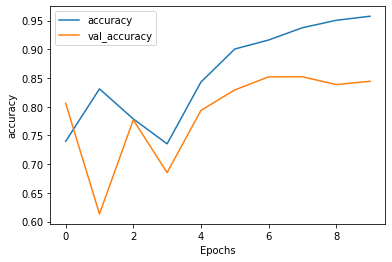

In [12]:
plot_graphs(history, 'accuracy')

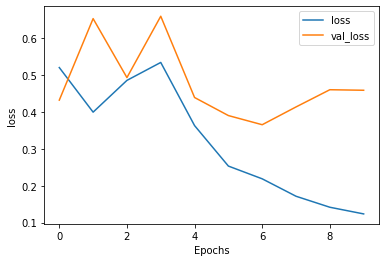

In [13]:
plot_graphs(history, 'loss')

I won't run the rest of the models (multi layers LSTM ,  Convolutional Layer ...) described in the videos 